# Introduction
In this practical, we implement and train a feed-forward neural network (also known as an "MLP" for "multi-layer perceptron") on a dataset called "Fashion MNIST", consisting of small greyscale images of items of fashion.

# Learning Objectives

* Understand how to use Keras Layers to build a neural network architecture
* Understand how a model is trained and evaluated
* Understand the concept of train/validation/test split and why it's useful

In [2]:
from __future__ import print_function

import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import to_categorical

# Data
In this practical, we use the Fashion MNIST dataset consisting of 70,000 greyscale images and their labels. The dataset is divided
 into 60,000 training images and 10,000 test images. The idea is to train a **classifier** to identify the class value (what type of fashion item it is) given the image. We train and *tune* a model on the 60,000 training images and then evaluate how well it classifies the 10,000 test images that the model did not see during training. This task is an example of a **supervised learning** problem, where we are given both input and labels (targets) to learn from. This is in contrast to **unsupervised learning** where we only have inputs from which to learn patterns or **reinforcement learning** where an agent learns how to maximise a reward signal through interaction with its environment. 

![Texte alternatif…](https://res.cloudinary.com/practicaldev/image/fetch/s---fNWEeWA--/c_imagga_scale,f_auto,fl_progressive,h_420,q_auto,w_1000/https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png)

# Train/Validation/Test Split

When we build machine learning models, the goal is to build a model that will perform well on future data that we have not seen yet. We say that we want our models to be able to generalise well from whatever training data we can collect and do have available, to whatever data we will be applying them to in future. To do this, we split whatever data we have available into a training set, a validation set and a test set. The idea is that we train our model and use the performance on the validation set to make any adjustments to the model and its hyperparameters, but then we report the final accuracy on the test set. The test set (which we never train on), therefore acts as a proxy for our future data.

In [3]:
(train_and_validation_images, train_and_validation_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
# Construct a validation set from the last 10000 images and labels from 
# train_and_validation_images and train_and_validation_labels
validation_images = train_and_validation_images[-10000:, :, :] #picking the last 10k rows with pixel size of 28 by 28 for the train validation dataset
validation_labels = train_and_validation_labels[-10000:]

# Construct a training set from the first 50000 images and labels.
train_images = train_and_validation_images[:50000, :, :] # selecting first to 500kth image row for the train dataset
train_labels = train_and_validation_labels[:50000]

In [6]:
train_images.shape

(50000, 28, 28)

In [7]:
text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] # 10 targets or outputs

Text(0.5, 1.0, 'True Class: 5 ("Sandal")')

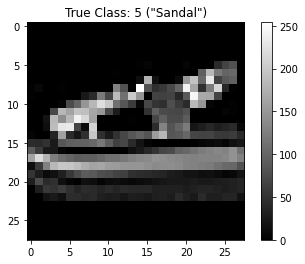

In [8]:
plt.figure()
random_index = np.random.randint(0, 50000) #randomly selecting number
plt.imshow(train_images[random_index], cmap='gray') #Shows the train image that falls on the selected number
plt.colorbar()
numerical_label = train_labels[random_index] #matching the randomly selected trained image with its label index
text_description = text_labels[numerical_label] # Using the selected train_labelled index to pick the actual name on the text_labels
plt.title('True Class: {} ("{}")'.format(numerical_label, text_description))

# plt.gca().grid(False)

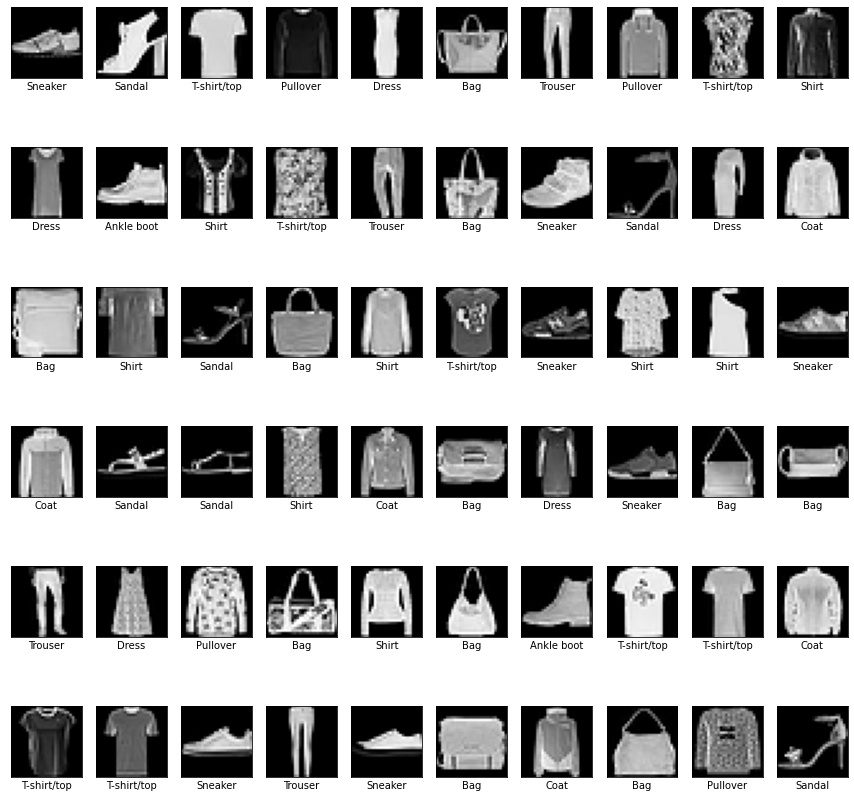

In [9]:
# Another view, showing 50 randomly selected images at a time
plt.figure(figsize=(15,15)) # setting the size of the image
for i in range(60): # indicating number of images to show
    plt.subplot(6,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    
    img_index = np.random.randint(0, 50000)
    plt.imshow(train_images[img_index], cmap=plt.cm.gray)
    plt.xlabel(text_labels[train_labels[img_index]])

# Preprocess

In [11]:
# Flatten

train_images_flatten = train_images.reshape(train_images.shape[0], 784) # 26*26 gives 784
validation_images_flatten = validation_images.reshape(validation_images.shape[0],784)
test_images_flatten = test_images.reshape(test_images.shape[0],784)

In [12]:
# Normalize

train_images_model = train_images_flatten/255. # Normalizes the image between 0 to 1 where 1 is brightest and zero is darkest. color image ranges from 0 -255 reason for dividing by 255
validation_images_model = validation_images_flatten/255
test_images_model = test_images_flatten/255 #

In [13]:
# convert class vectors to binary class matrices for the labels or outputs
train_labels_categ = to_categorical(train_labels, 10)
validation_labels_categ = to_categorical(validation_labels, 10)
test_labels_categ = to_categorical(test_labels, 10)

# Train

In [14]:
batch_size = 128
num_classes = 10
epochs = 40

# Create a sequential model here 


from keras.layers.activation.relu import ReLU
# Defining the model
# model = Sequential()
# model.add(Dense(256,  activation = 'relu')
# model.add(Dense(128, activation = 'softmax'))
# model.add(Dense(10, activation = 'softmax')) # Because final output is a classification

model = Sequential([
  Dense(256, activation='relu'),
  Dropout(0.5),
  Dense(128, activation='softmax'),
  
  Dense(10, activation='softmax')])

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(train_images_model, train_labels_categ,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(validation_images_model, validation_labels_categ))


Epoch 1/40
391/391 [==============================] - 5s 10ms/step - loss: 1.9534 - accuracy: 0.4946 - val_loss: 1.7411 - val_accuracy: 0.5471
Epoch 2/40
391/391 [==============================] - 3s 9ms/step - loss: 1.5646 - accuracy: 0.5649 - val_loss: 1.3913 - val_accuracy: 0.6237
Epoch 3/40
391/391 [==============================] - 4s 10ms/step - loss: 1.2602 - accuracy: 0.6419 - val_loss: 1.1215 - val_accuracy: 0.6606
Epoch 4/40
391/391 [==============================] - 4s 10ms/step - loss: 1.0392 - accuracy: 0.6696 - val_loss: 0.9427 - val_accuracy: 0.6909
Epoch 5/40
391/391 [==============================] - 4s 9ms/step - loss: 0.8911 - accuracy: 0.6990 - val_loss: 0.8272 - val_accuracy: 0.7211
Epoch 6/40
391/391 [==============================] - 4s 9ms/step - loss: 0.7965 - accuracy: 0.7270 - val_loss: 0.7527 - val_accuracy: 0.7394
Epoch 7/40
391/391 [==============================] - 4s 9ms/step - loss: 0.7285 - accuracy: 0.7650 - val_loss: 0.6976 - val_accuracy: 0.7951
Epo

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


# Test

In [17]:
score = model.evaluate(test_images_model, test_labels_categ, verbose=0)
print('Test accuracy:', score)
# You should be able to get,at least, 88% accuracy

Test accuracy: [0.4147265553474426, 0.8715999722480774]


In [18]:
test_logits = model.predict(test_images_model)

313/313 [==============================] - 1s 2ms/step


In [19]:
test_logits

array([[2.4536496e-04, 2.4955674e-05, 1.5486150e-04, ..., 2.7142763e-02,
        5.5890521e-03, 9.6045351e-01],
       [2.0053776e-04, 6.3726300e-05, 8.4548610e-01, ..., 7.8986322e-06,
        1.0386835e-03, 1.2803157e-06],
       [3.1224141e-04, 9.9833578e-01, 3.2702310e-04, ..., 4.5720981e-06,
        7.2572926e-05, 1.2345948e-05],
       ...,
       [8.2584076e-05, 2.7370317e-07, 2.8814479e-06, ..., 8.4910184e-08,
        9.8608226e-01, 1.3670291e-02],
       [3.1224318e-04, 9.9833578e-01, 3.2702339e-04, ..., 4.5721154e-06,
        7.2573210e-05, 1.2345983e-05],
       [8.3134233e-05, 7.9301344e-06, 6.7388974e-05, ..., 2.8380842e-03,
        2.4269785e-04, 6.7345251e-04]], dtype=float32)

In [20]:
test_predictions = np.argmax(test_logits, axis=1)


In [21]:
test_predictions

array([9, 2, 1, ..., 8, 1, 5])

In [22]:
model.evaluate(test_images_model, test_labels_categ)

313/313 [==============================] - 1s 2ms/step - loss: 0.4147 - accuracy: 0.8716


[0.4147265553474426, 0.8715999722480774]

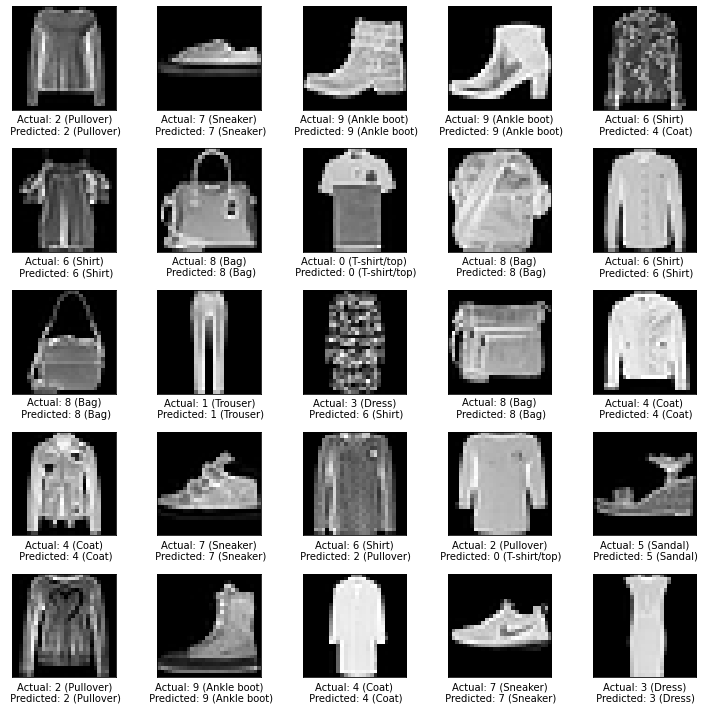

In [26]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    
    img_index = np.random.randint(0, 10000)
    plt.imshow(test_images[img_index], cmap=plt.cm.gray)
    
    actual_label = int(test_labels[img_index])
    predicted_label = int(test_predictions[img_index])
    
    
    plt.xlabel("Actual: {} ({})\n Predicted: {} ({})".format(
        actual_label, text_labels[actual_label], predicted_label, text_labels[predicted_label]
    ))
    
plt.tight_layout()
plt.show()